In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/My Drive'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

**Default of Credit Card**
<br>
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [ ]:
import pandas as pd
df = pd.read_csv('klasifikasi.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df = df.rename(columns={'PAY_0': 'PAY_1',
                        'default.payment.next.month':'default_payment'})

A. EDA

Visualisasi distribusi data tiap fitur dataset menggunakan histogram.

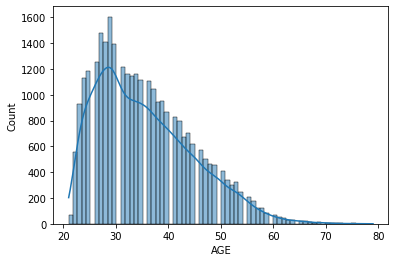

In [ ]:
sns.histplot(df, x='AGE', kde=True)

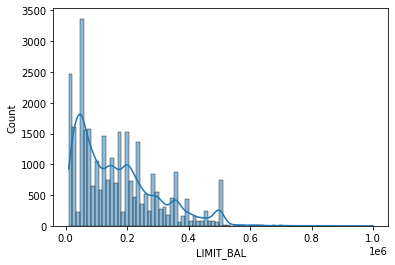

In [ ]:
sns.histplot(df, x='LIMIT_BAL', kde=True)

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins, kde=False):
    fig = plt.figure(figsize=(15,10))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.histplot(df, x=df[var_name], bins=n_bins, ax=ax, kde=kde)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

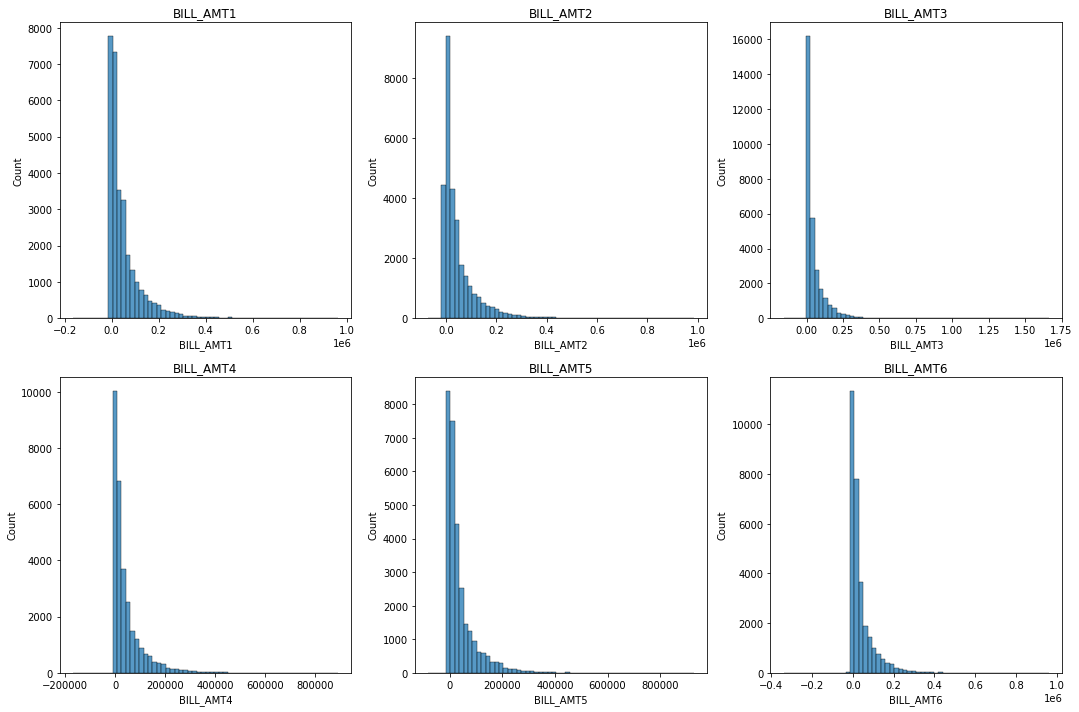

In [ ]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 60)

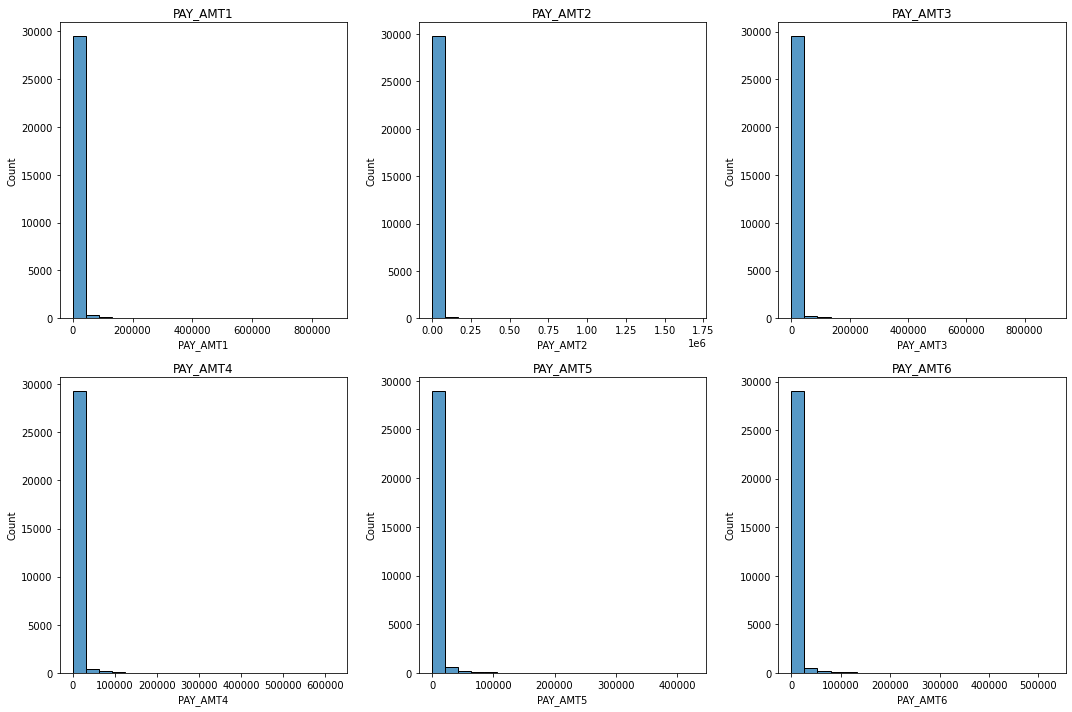

In [ ]:
pay_amt = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay_amt, pay_amt.columns, 2, 3, 20)

In [ ]:
def draw_barplot(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(15,10))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.countplot(data=df, x=df[var_name])
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

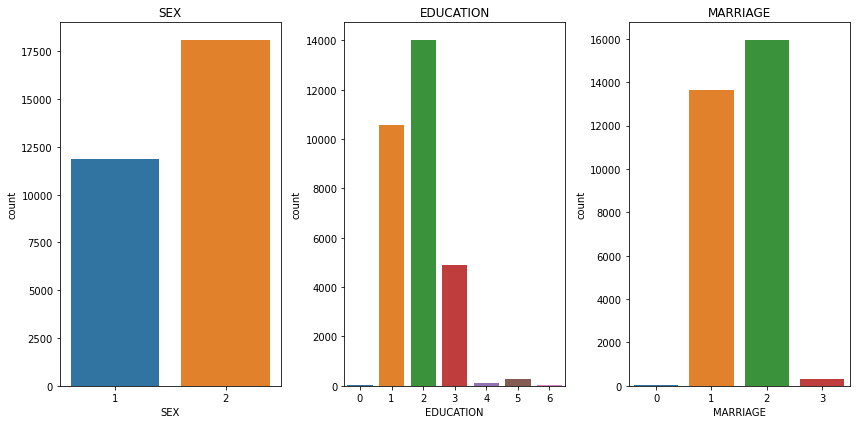

In [ ]:
cat_col = df[['SEX', 'EDUCATION', 'MARRIAGE']]
draw_barplot(cat_col, cat_col.columns, 1, 3)

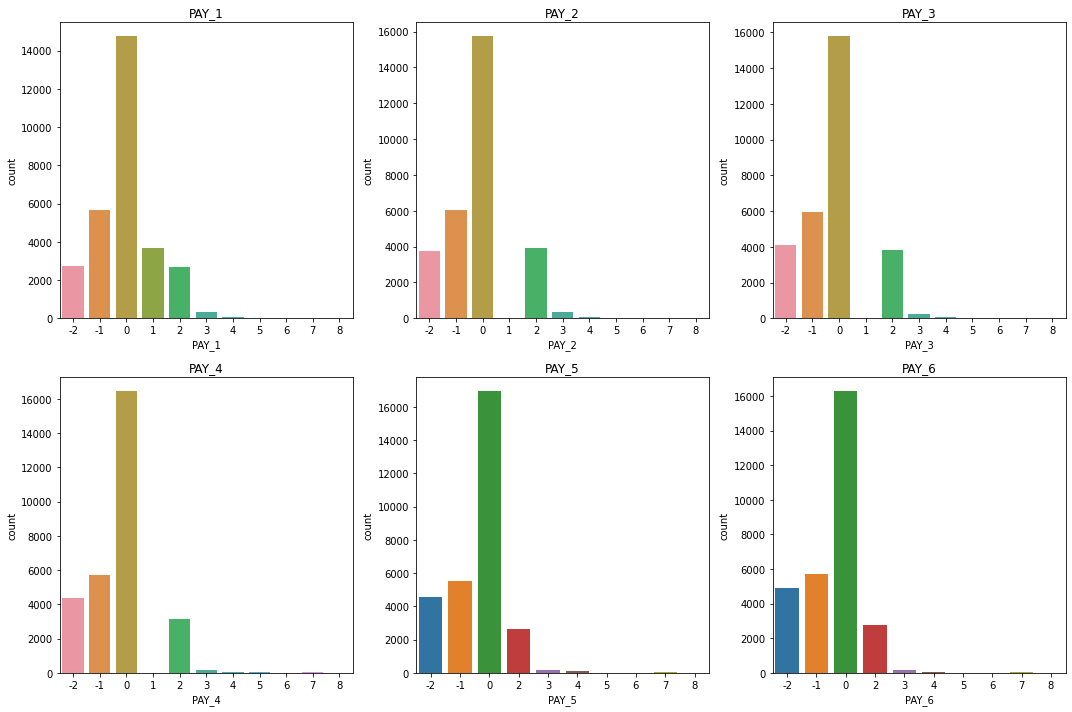

In [ ]:
pay = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_barplot(pay, pay.columns, 2, 3)

Korelasi antar fitur non-kategorikal dengan heatmap

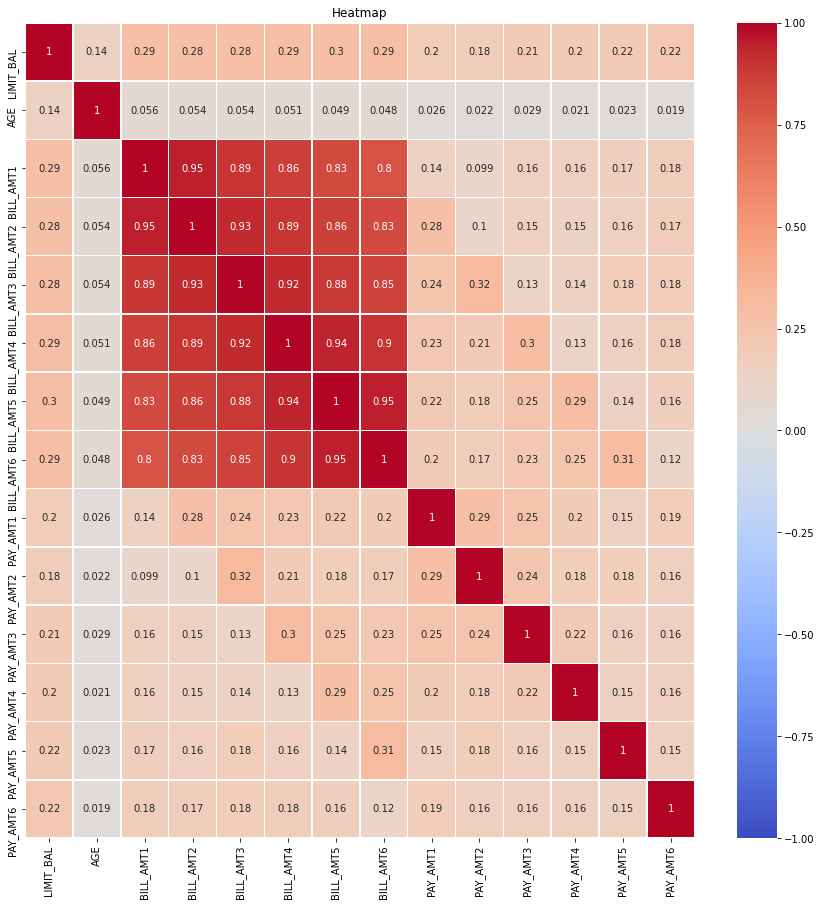

In [ ]:
heat_col = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(15,15))
plt.title('Heatmap')
corr = df[heat_col].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            linewidths=.5, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

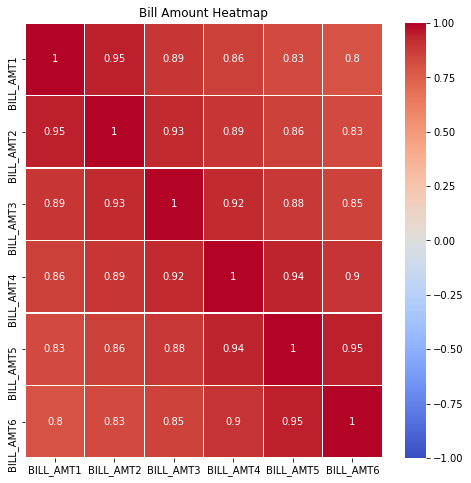

In [ ]:
bil_col = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize=(8,8))
plt.title('Bill Amount Heatmap')
corr = df[bil_col].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            linewidths=.2, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

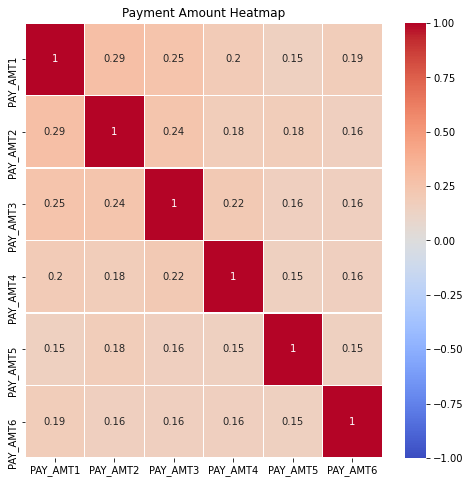

In [ ]:
pay_amt_col = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(8,8))
plt.title('Payment Amount Heatmap')
corr = df[pay_amt_col].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            linewidths=.2, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

Persentase status default untuk kategori fitur `SEX`

In [ ]:
sex_default = pd.concat([pd.crosstab(df['SEX'], df['default_payment']).reset_index()[[0,1]], 
                         df[['SEX', 'default_payment']].groupby(['SEX'], as_index=False).mean()], axis=1)
sex_default = sex_default[['SEX',0,1,'default_payment']]
sex_default.columns = ['SEX', 'default_payment_0', 'default_payment_1', 'default_payment_proba']
sex_default.sort_values('default_payment_proba', ascending=False)

,SEX,default_payment_0,default_payment_1,default_payment_proba
0,1,9015,2873,0.241672
1,2,14349,3763,0.207763


Jenis gender pada fitur `SEX` dengan nilai 1 memiliki probabilitas default dengan nilai tertinggi (0.241672).

Persentase status default untuk kategori fitur `MARRIAGE`

In [ ]:
marriage_default = pd.concat([pd.crosstab(df['MARRIAGE'], df['default_payment']).reset_index()[[0,1]], 
                              df[['MARRIAGE', 'default_payment']].groupby(['MARRIAGE'], as_index=False).mean()], axis=1)
marriage_default = marriage_default[['MARRIAGE',0,1,'default_payment']]
marriage_default.columns = ['MARRIAGE', 'default_payment_0', 'default_payment_1', 'default_payment_proba']
marriage_default.sort_values('default_payment_proba', ascending=False)

,MARRIAGE,default_payment_0,default_payment_1,default_payment_proba
3,3,239,84,0.260062
1,1,10453,3206,0.234717
2,2,12623,3341,0.209283
0,0,49,5,0.092593


Status pernikahan pada fitur `MARRIAGE` dengan nilai 3 memiliki probabilitas default dengan nilai tertinggi (0.260062).

Persentase status default untuk kategori fitur `EDUCATION`

In [ ]:
education_default = pd.concat([pd.crosstab(df['EDUCATION'], df['default_payment']).reset_index()[[0,1]], 
                               df[['EDUCATION', 'default_payment']].groupby(['EDUCATION'], as_index=False).mean()], axis=1)
education_default = education_default[['EDUCATION',0,1,'default_payment']]
education_default.columns = ['EDUCATION', 'default_payment_0', 'default_payment_1', 'default_payment_proba']
education_default.sort_values('default_payment_proba', ascending=False)

,EDUCATION,default_payment_0,default_payment_1,default_payment_proba
3,3,3680,1237,0.251576
2,2,10700,3330,0.237349
1,1,8549,2036,0.192348
6,6,43,8,0.156863
5,5,262,18,0.064286
4,4,116,7,0.056911
0,0,14,0,0.000000


Tingkat pendidikan pada fitur `EDUCATION` dengan nilai 3 memiliki probabilitas default dengan nilai tertinggi (0.251576).

B.	Classification

Feature selection menggunakan Decision Tree berdasarkan nilai Gini Index.


In [ ]:
# Kolom input
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
        'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
        'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
# Kolom target
y = df['default_payment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 24000, Test set size: 6000


In [ ]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
classifier.feature_importances_

array([0.05987636, 0.01388274, 0.01910077, 0.01456894, 0.07638939,
       0.16110883, 0.03583368, 0.0106023 , 0.00568621, 0.01419703,
       0.00890976, 0.06993295, 0.04445621, 0.04158538, 0.03994631,
       0.04358138, 0.04772721, 0.04856891, 0.05216604, 0.0540034 ,
       0.03921166, 0.04744241, 0.05122215])

In [ ]:
df_feature = pd.DataFrame({'Feature': X.columns, 
                           'Feature Importance': classifier.feature_importances_
                           }).sort_values('Feature Importance', ascending=False).reset_index(drop=True)
df_feature

,Feature,Feature Importance
0,PAY_1,0.161109
1,AGE,0.076389
2,BILL_AMT1,0.069933
3,LIMIT_BAL,0.059876
4,PAY_AMT3,0.054003
5,PAY_AMT2,0.052166
6,PAY_AMT6,0.051222
7,PAY_AMT1,0.048569
8,BILL_AMT6,0.047727
9,PAY_AMT5,0.047442


Visualisasi urutan tingkat kepentingan fitur berdasarkan Gini Index.

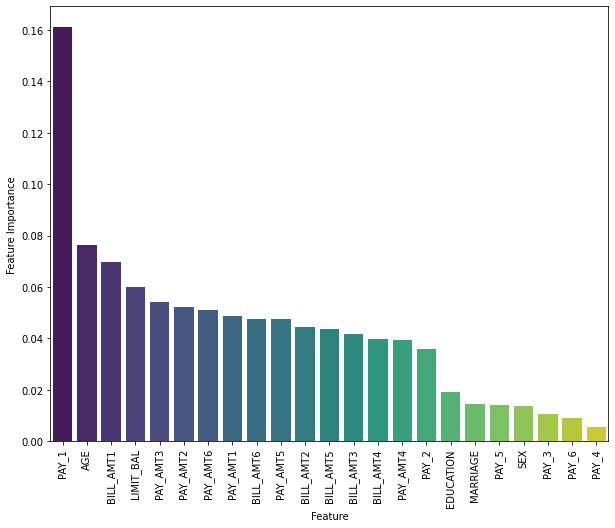

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, x='Feature', y='Feature Importance', palette='viridis')
plt.xticks(rotation=90)
plt.show() 

Model klasifikasi untuk memprediksi status default dengan algoritma Naive Bayes dan SVM menggunakan 7 fitur dengan kepentingan tertinggi.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold

In [ ]:
df_new = df[['PAY_1', 'AGE', 'BILL_AMT1', 'LIMIT_BAL', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT6', 'default_payment']]

In [ ]:
features = ['PAY_1', 'AGE', 'BILL_AMT1', 'LIMIT_BAL', 'PAY_AMT3', 'PAY_AMT6', 'PAY_AMT2']

In [ ]:
clf_list = [GaussianNB(),
            SVC(kernel='sigmoid'),
           ]

In [ ]:
kf = KFold(n_splits=5, random_state=45, shuffle=True)

mdl = []
fold = []
acc_scr = []
rec_scr = []
prc_scr = []
f1_scr = []
ra_scr = []

for i, (train_index, test_index) in enumerate(kf.split(df_new)):
    train_set = df_new.iloc[train_index,:]
    test_set  = df_new.iloc[test_index,:]
    print('Fold: ', i+1)
    
    for clf in clf_list:
        model = clf.__class__.__name__
        X_train = train_set[features]
        y_train = train_set['default_payment']
        X_test = test_set[features]
        y_test = test_set['default_payment']

        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train) 
        y_pred = clf.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        prc = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        ra = roc_auc_score(y_test, y_pred)
        
        fold.append(i+1)
        acc_scr.append(acc)
        rec_scr.append(rec)
        prc_scr.append(prc)
        f1_scr.append(f1)
        ra_scr.append(ra)
        mdl.append(model)
        print(model)

print('Training selesai')          

Fold:  1
GaussianNB
SVC
Fold:  2
GaussianNB
SVC
Fold:  3
GaussianNB
SVC
Fold:  4
GaussianNB
SVC
Fold:  5
GaussianNB
SVC
Training selesai


In [ ]:
df_acc = pd.DataFrame({'Fold':fold, 'Model':mdl,'Accuracy Score':acc_scr})
df_rec = pd.DataFrame({'Fold':fold, 'Model':mdl,'Recall Score':rec_scr})
df_prc = pd.DataFrame({'Fold':fold, 'Model':mdl,'Precision Score':prc_scr})
df_f1  = pd.DataFrame({'Fold':fold, 'Model':mdl,'F1 Score':f1_scr})
df_ra  = pd.DataFrame({'Fold':fold, 'Model':mdl,'ROC-AUC Score':ra_scr})

In [ ]:
df_score = pd.concat([df_acc, df_rec['Recall Score'], df_prc['Precision Score'],
                      df_f1['F1 Score'], df_ra['ROC-AUC Score']], axis=1)
df_score

,Fold,Model,Accuracy Score,Recall Score,Precision Score,F1 Score,ROC-AUC Score
0,1,GaussianNB,0.504667,0.739336,0.261599,0.386457,0.590623
1,1,SVC,0.668667,0.233807,0.225266,0.229457,0.509384
2,2,GaussianNB,0.462333,0.770370,0.262892,0.392009,0.571637
3,2,SVC,0.654167,0.221481,0.226002,0.223719,0.500633
4,3,GaussianNB,0.508667,0.776435,0.279348,0.410871,0.604642
5,3,SVC,0.668167,0.245468,0.246773,0.246119,0.516661
6,4,GaussianNB,0.542333,0.741912,0.296416,0.423594,0.612874
7,4,SVC,0.650500,0.197059,0.210526,0.203570,0.490232
8,5,GaussianNB,0.421333,0.816617,0.252663,0.385921,0.562361
9,5,SVC,0.655167,0.231287,0.228719,0.229996,0.503937


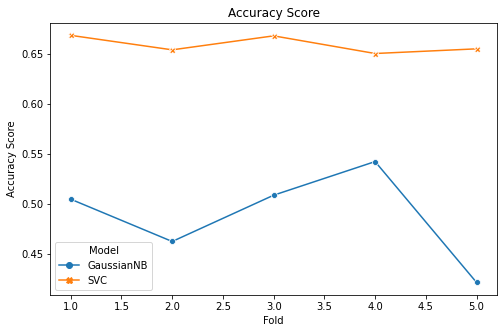

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Accuracy Score')
sns.lineplot(data=df_acc, x='Fold', y='Accuracy Score', hue='Model', style='Model', markers=True, dashes=False)
plt.show()

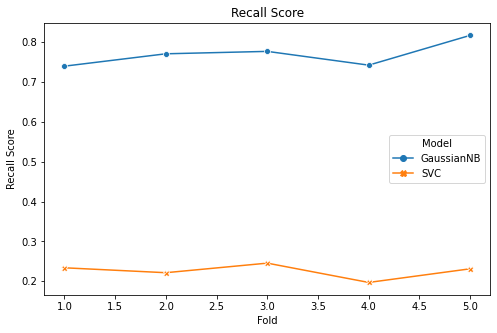

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Recall Score')
sns.lineplot(data=df_rec, x='Fold', y='Recall Score', hue='Model', style='Model', markers=True, dashes=False)
plt.show()

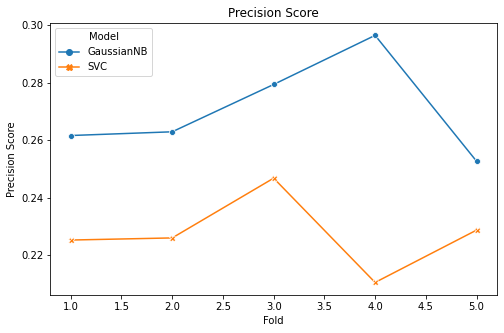

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Precision Score')
sns.lineplot(data=df_prc, x='Fold', y='Precision Score', hue='Model', style='Model', markers=True, dashes=False)
plt.show()

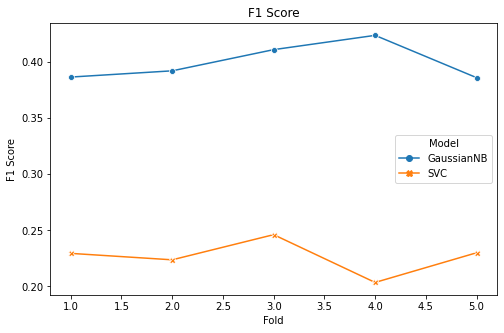

In [ ]:
plt.figure(figsize=(8,5))
plt.title('F1 Score')
sns.lineplot(data=df_f1, x='Fold', y='F1 Score', hue='Model', style='Model', markers=True, dashes=False)
plt.show()

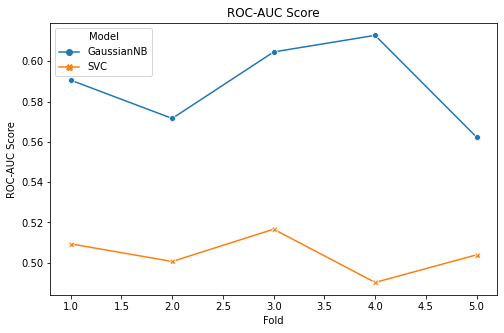

In [ ]:
plt.figure(figsize=(8,5))
plt.title('ROC-AUC Score')
sns.lineplot(data=df_ra, x='Fold', y='ROC-AUC Score', hue='Model', style='Model', markers=True, dashes=False)
plt.show()